In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Load dataset

In [ ]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00325/Sensorless_drive_diagnosis.txt"
data = pd.read_csv(url, sep=" ", header=None)

Perform grid search

In [ ]:
# Split features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define SVM classifier
svm_clf = SVC()

# Define parameter grid for grid search
param_grid = {'C': [10], 
              'kernel': ['linear', 'rbf', 'sigmoid'], 
              'gamma': ['scale', 'auto']
              }

# Perform grid search
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X, y)

# Print best parameters and accuracy
print("Best parameters: ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)

Perform random search

In [ ]:
# Define parameter grid for random search
param_dist = {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}
n_iter_search = 20

# Perform random search
random_search = RandomizedSearchCV(svm_clf, param_distributions=param_dist, n_iter=n_iter_search, cv=5)
random_search.fit(X, y)

# Print best parameters and accuracy
print("Best parameters: ", random_search.best_params_)
print("Accuracy: ", random_search.best_score_)

Train and evaluate SVM classifier with k-fold cross-validation

In [ ]:
# Define k-fold cross-validation
kf = KFold(n_splits=5)

# Train and evaluate SVM classifier with k-fold cross-validation
accuracy_scores = []
conf_matrices = []
for train_idx, test_idx in kf.split(X):
    # Split data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train SVM classifier
    svm_clf = SVC(C=random_search.best_params_['C'], kernel=random_search.best_params_['kernel'])
    svm_clf.fit(X_train, y_train)
    
    # Evaluate SVM classifier
    y_pred = svm_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy_scores.append(accuracy)
    conf_matrices.append(conf_matrix)

Print average accuracy and confusion matrix

In [ ]:
# Print average accuracy and confusion matrix
print(conf_matrix)
print("Average accuracy: ", np.mean(accuracy_scores))
print("Confusion matrix: ", np.mean(conf_matrices, axis=0))

[[   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [  42   54    0   31    1  132    0  267  533    3    0]
 [ 568  439 1757  114  246  402    1  456  659  656   21]
 [  13   35    7    6    4   25    1   37   17    5 5169]]
Average accuracy:  0.10942648047105344
Confusion matrix:  [[0.0000e+00 0.0000e+00 9.8200e+01 2.9200e+01 1.3860e+02 2.4440e+02
  1.4000e+00 9.9600e+01 1.7260e+02 2.7120e+02 8.6000e+00]
 [0.0000e+00 0.0000e+00 5.7400e+01 2.5400e+01 8.4000e+01 2.2280e+02
  4.2000e+00 7.3000e+01 2.1440e+02 3.7240e+02 1.0200e+01]
 [1.8540e+02 5.2600e+01 8.4000e+00 1.7000e+01 6.300

Plot confusion matrix

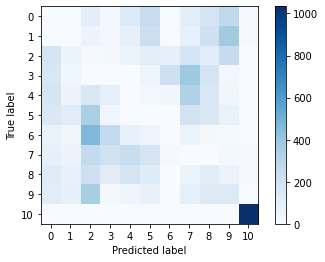

In [ ]:
# Plot confusion matrix
plt.imshow(np.mean(conf_matrices, axis=0), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(11))
plt.yticks(np.arange(11))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()